In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import missingno as msno
from datetime import timedelta

In [26]:
df = pd.read_csv('weather_data.csv', parse_dates=['date'])
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nDescriptive statistics:")
print(df.describe())

Dataset shape: (311, 7)

First 5 rows:
        date  avg_temperature   humidity  avg_wind_speed rain_or_not  \
0 2023-01-01        23.745401  46.140905        7.845981        Rain   
1 2023-01-02        30.030503  59.876587        5.382457        Rain   
2 2023-01-03        28.365224  51.464618       13.158008        Rain   
3 2023-01-04        27.550929  53.103799        5.886677        Rain   
4 2023-01-05        23.639303  57.826186       12.248992        Rain   

   cloud_cover     pressure  
0    20.851051   992.965681  
1    93.059521  1037.273025  
2    11.636640  1034.193357  
3    81.744971   968.610142  
4    38.062329  1030.264331  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             311 non-null    datetime64[ns]
 1   avg_temperature  296 non-null    float64       
 2   humidity    

In [27]:
print("\nMissing values in each column:")
print(df.isnull().sum())
plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.title('Missing Value Patterns')
plt.savefig('missing_values.png')
plt.close()


Missing values in each column:
date                0
avg_temperature    15
humidity           15
avg_wind_speed     15
rain_or_not         0
cloud_cover        15
pressure            0
dtype: int64


<Figure size 1000x600 with 0 Axes>

Dataset Shape: (311, 7)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             311 non-null    datetime64[ns]
 1   avg_temperature  296 non-null    float64       
 2   humidity         296 non-null    float64       
 3   avg_wind_speed   296 non-null    float64       
 4   rain_or_not      311 non-null    object        
 5   cloud_cover      296 non-null    float64       
 6   pressure         311 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 17.1+ KB

Basic Statistics:
                      date  avg_temperature    humidity  avg_wind_speed  \
count                  311       296.000000  296.000000      296.000000   
mean   2023-06-05 00:00:00        25.983840   55.041385        7.556636   
min    2023-01-01 00:00:00        15.000000   30.000000        0

C:\Users\Thevindu Kalubowila\AppData\Local\Temp\ipykernel_36952\835314373.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_df = pd.read_csv('weather_data.csv',


,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331


C:\Users\Thevindu Kalubowila\AppData\Local\Temp\ipykernel_36952\835314373.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

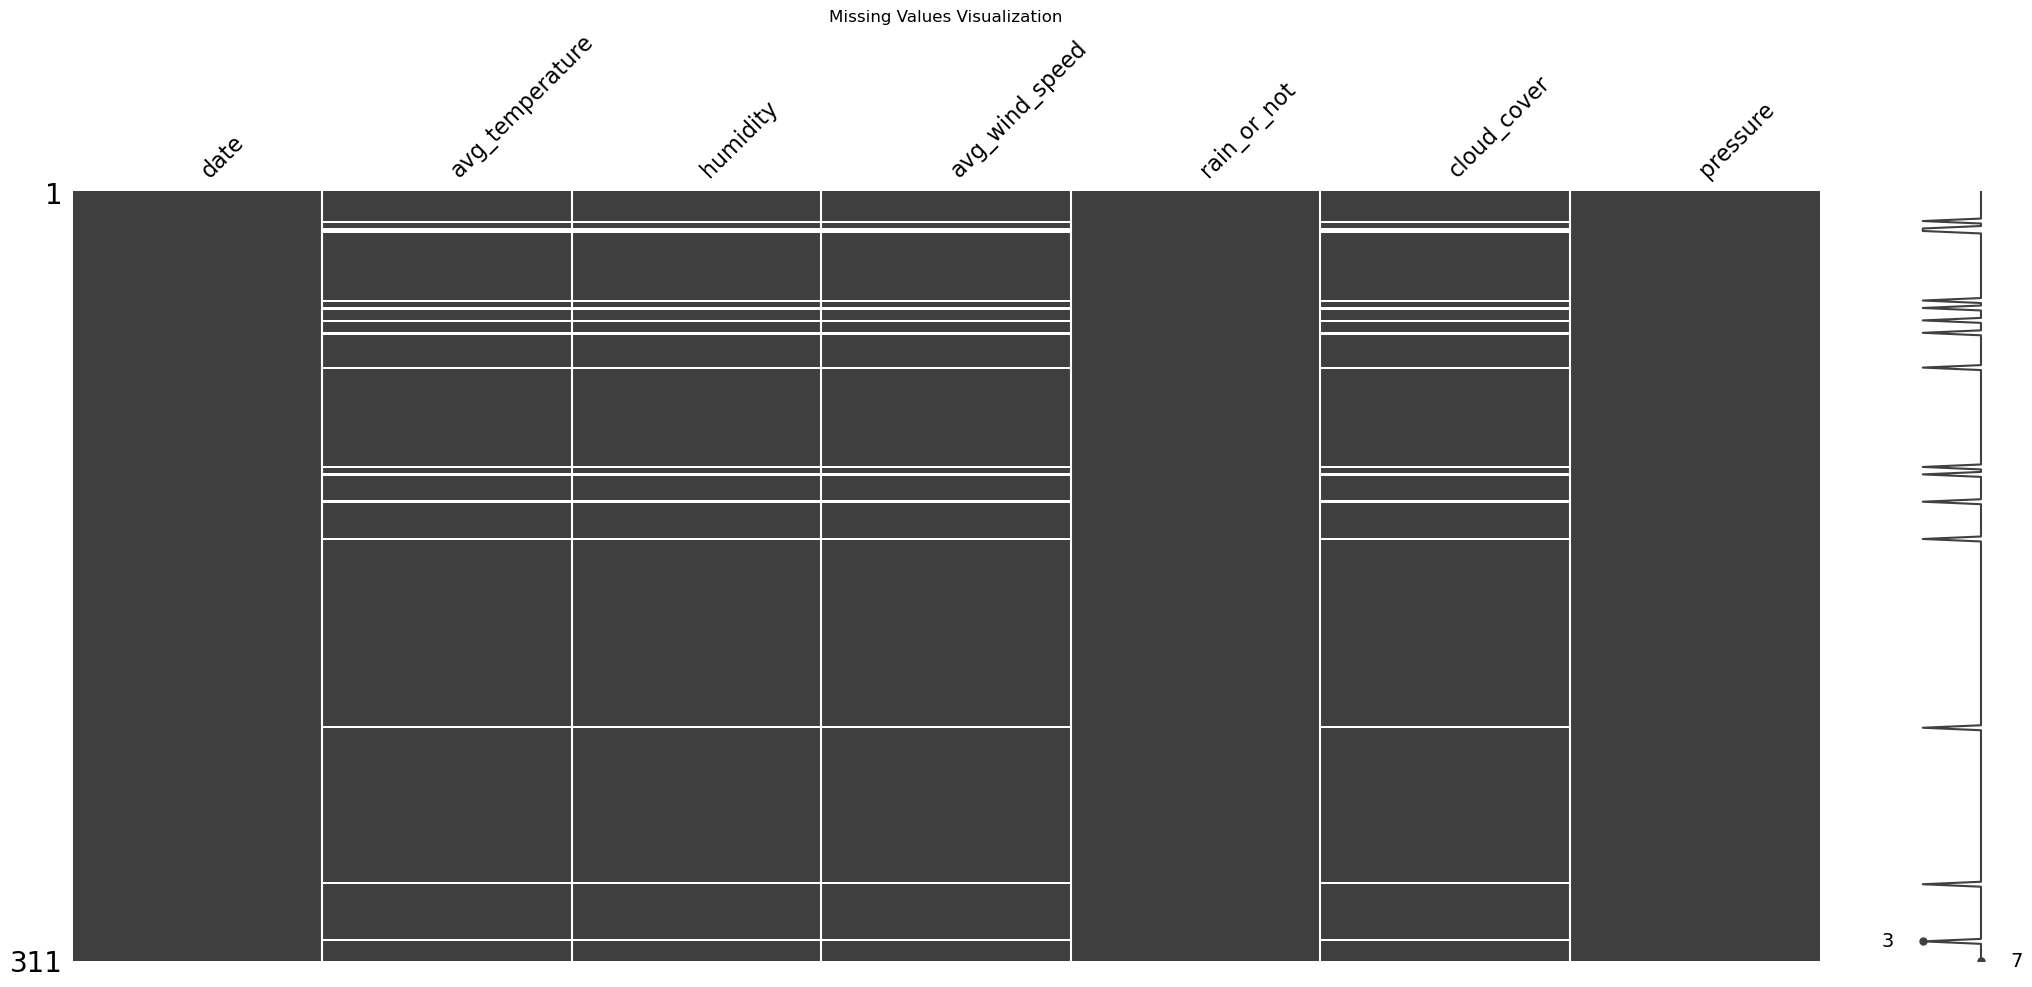

In [28]:
# Load the weather dataset with date parsing
# Replace 'path/to/weather_data.csv' with your actual file path
weather_df = pd.read_csv('weather_data.csv', 
                         parse_dates=['date'],  # Replace with actual date column name
                         infer_datetime_format=True)

# Display basic information about the dataset
print("Dataset Shape:", weather_df.shape)
print("\nDataset Info:")
weather_df.info()

# Display basic statistics
print("\nBasic Statistics:")
print(weather_df.describe())

# Check for missing values
print("\nMissing Values:")
print(weather_df.isnull().sum())

# Display first few rows
print("\nFirst 5 rows of data:")
display(weather_df.head())

# Visualize missing values using missingno
plt.figure(figsize=(10, 6))
msno.matrix(weather_df)
plt.title('Missing Values Visualization')
plt.tight_layout()
plt.show()

# Time series plot (if data contains temperature or similar measurements)
if 'temperature' in weather_df.columns: 
    plt.figure(figsize=(12, 6))
    weather_df.set_index('date').temperature.plot()
    plt.title('Temperature Over Time')
    plt.ylabel('Temperature')
    plt.tight_layout()
    plt.show()

In [29]:
# Handle date formatting issues
# Ensure dates are in proper datetime format
weather_df['date'] = pd.to_datetime(weather_df['date'], errors='coerce')

# Check for NaT (Not a Time) values which indicate parsing failures
if weather_df['date'].isnull().any():
    print(f"\nFound {weather_df['date'].isnull().sum()} invalid date entries")
    # Drop rows with invalid dates or replace with neighboring dates
    weather_df = weather_df.dropna(subset=['date'])
    
# Sort by date to ensure chronological order
weather_df = weather_df.sort_values('date').reset_index(drop=True)

print("\nDate range in dataset:")
print(f"Start: {weather_df['date'].min()}, End: {weather_df['date'].max()}")

# Check for gaps in the time series
date_diff = weather_df['date'].diff().dropna()
print("\nTime intervals between records:")
print(date_diff.value_counts().sort_index().head())

# Check if we have regular daily data
is_daily = (date_diff == timedelta(days=1)).all()
print(f"\nData has regular daily intervals: {is_daily}")

# Add date components for time series analysis
weather_df['year'] = weather_df['date'].dt.year
weather_df['month'] = weather_df['date'].dt.month
weather_df['day'] = weather_df['date'].dt.day
weather_df['day_of_week'] = weather_df['date'].dt.dayofweek
weather_df['day_name'] = weather_df['date'].dt.day_name()
weather_df['is_weekend'] = weather_df['day_of_week'].isin([5, 6]).astype(int)

print("\nDate components added to dataset:")
display(weather_df[['date', 'year', 'month', 'day', 'day_name', 'is_weekend']].head())


Date range in dataset:
Start: 2023-01-01 00:00:00, End: 2023-11-07 00:00:00

Time intervals between records:
date
1 days    310
Name: count, dtype: int64

Data has regular daily intervals: True

Date components added to dataset:


,date,year,month,day,day_name,is_weekend
0,2023-01-01,2023,1,1,Sunday,1
1,2023-01-02,2023,1,2,Monday,0
2,2023-01-03,2023,1,3,Tuesday,0
3,2023-01-04,2023,1,4,Wednesday,0
4,2023-01-05,2023,1,5,Thursday,0


In [30]:
# Check for duplicate date entries
duplicates = weather_df[weather_df.duplicated(subset=['date'], keep=False)]

if len(duplicates) > 0:
    print(f"\nFound {len(duplicates)} duplicate date entries:")
    display(duplicates.sort_values('date'))
    
    # Option 1: Keep the first occurrence
    weather_df_dedup1 = weather_df.drop_duplicates(subset=['date'], keep='first')
    print(f"\nDataset size after removing duplicates (keeping first): {weather_df_dedup1.shape}")
    
    # Option 2: Average values for same dates
    weather_df_dedup2 = weather_df.groupby('date').mean(numeric_only=True).reset_index()
    
    # Restore non-numeric columns that might have been dropped during mean operation
    if 'rain_or_not' in weather_df.columns:
        # For categorical columns like 'rain_or_not', take the most common value for each date
        rain_mode = weather_df.groupby('date')['rain_or_not'].agg(lambda x: x.mode()[0]).reset_index()
        weather_df_dedup2 = weather_df_dedup2.merge(rain_mode, on='date')
    
    print(f"Dataset size after aggregating duplicates: {weather_df_dedup2.shape}")
    
    # Choose which deduplication method to use
    weather_df = weather_df_dedup1  # Change to weather_df_dedup2 if preferred
    
    print("\nChosen deduplication method: keeping first occurrence")
else:
    print("\nNo duplicate dates found in the dataset.")

# Verify there are no more duplicates
assert not weather_df.duplicated(subset=['date']).any(), "Duplicates still exist!"
print("Duplicate dates have been successfully handled.")

# Summary statistics for deduplicated data
print("\nSummary statistics after handling duplicates:")
print(weather_df[['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']].describe())


No duplicate dates found in the dataset.
Duplicate dates have been successfully handled.

Summary statistics after handling duplicates:
       avg_temperature    humidity  avg_wind_speed  cloud_cover     pressure
count       296.000000  296.000000      296.000000   296.000000   311.000000
mean         25.983840   55.041385        7.556636    49.834827  1001.059119
std           6.802475   19.220133        5.344683    29.009459    28.835595
min          15.000000   30.000000        0.069480     0.321826   951.240404
25%          20.265692   34.280826        3.550354    24.530951   975.757545
50%          27.177958   56.759806        7.326421    50.725120  1001.938586
75%          32.204599   72.189837       11.050627    76.046506  1026.578884
max          35.000000   90.000000       56.636041    99.834751  1049.543752


Missing values before imputation:
date                0
avg_temperature    15
humidity           15
avg_wind_speed     15
rain_or_not         0
cloud_cover        15
pressure            0
year                0
month               0
day                 0
day_of_week         0
day_name            0
is_weekend          0
dtype: int64

Interpolated missing temperature values based on time

Applied KNN imputation with 5 neighbors for humidity, avg_wind_speed, cloud_cover

After imputation, missing values:
date               0
avg_temperature    0
humidity           0
avg_wind_speed     0
rain_or_not        0
cloud_cover        0
pressure           0
year               0
month              0
day                0
day_of_week        0
day_name           0
is_weekend         0
dtype: int64


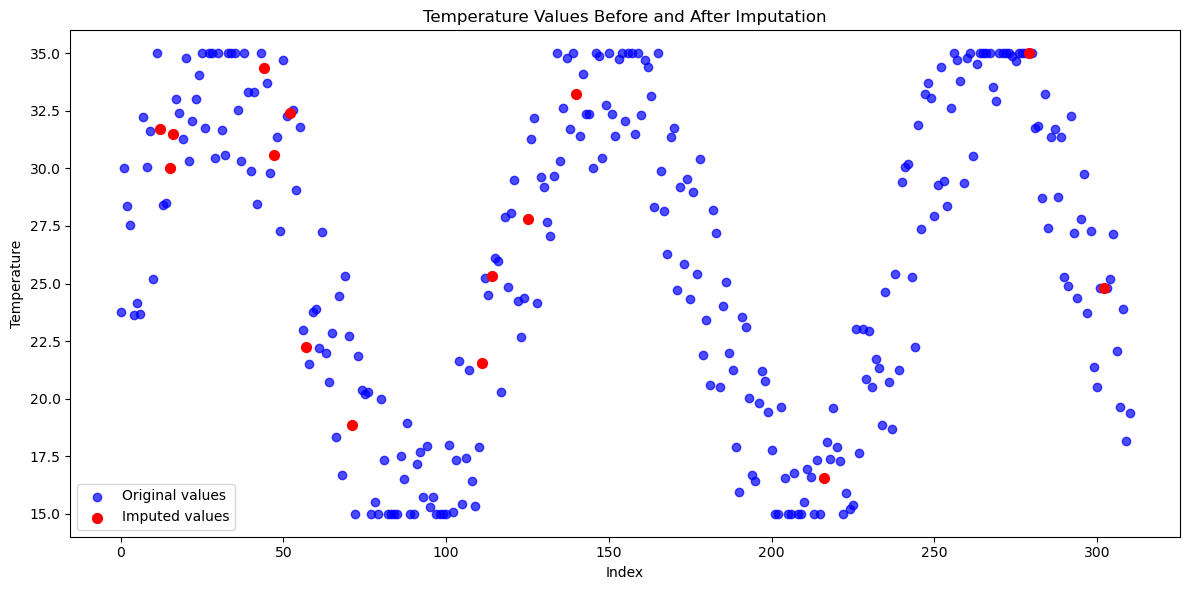

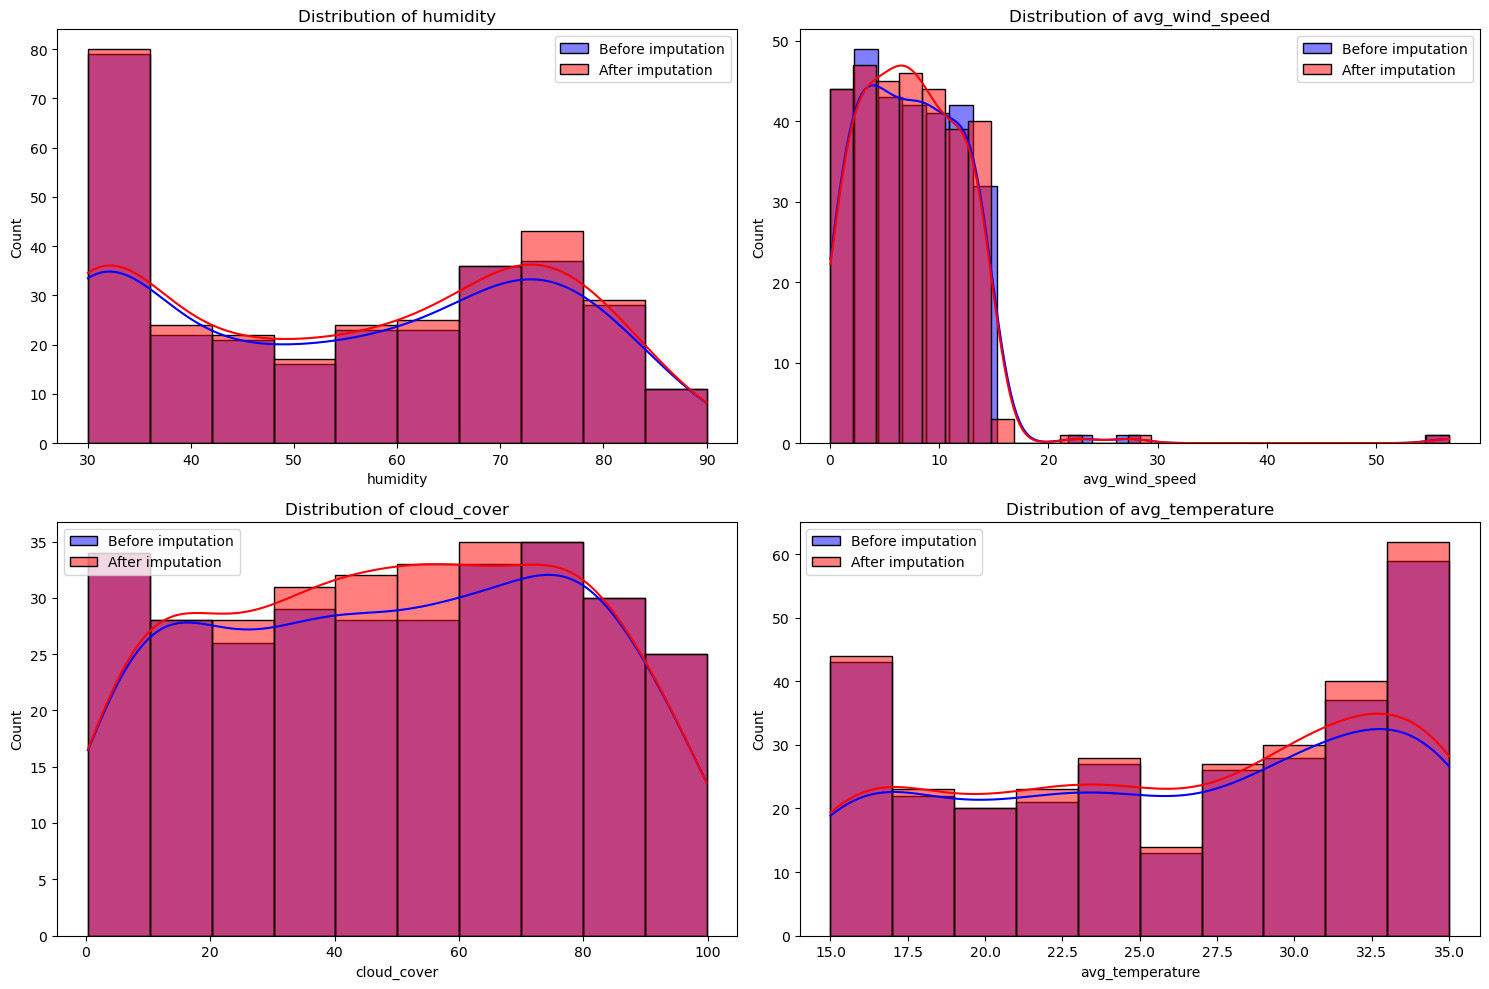


Cleaned dataset saved as 'weather_data_cleaned.csv'


In [31]:
# Make a copy of the dataframe before imputation for comparison
weather_df_before = weather_df.copy()

# Check missing values before imputation
print("Missing values before imputation:")
print(weather_df.isnull().sum())

# For temperature, use time-based interpolation
if weather_df['avg_temperature'].isnull().any():
    # Set 'date' as the index for time-based interpolation
    weather_df.set_index('date', inplace=True)
    # Since your data is already sorted by date, time-based interpolation will work well
    weather_df['avg_temperature'] = weather_df['avg_temperature'].interpolate(method='time')
    # Reset the index back to default
    weather_df.reset_index(inplace=True)
    print("\nInterpolated missing temperature values based on time")

# For humidity, wind speed, and cloud cover, use KNN imputation
num_cols = ['humidity', 'avg_wind_speed', 'cloud_cover']
if weather_df[num_cols].isnull().any().any():
    # Scale the data before KNN imputation for better results
    scaler = StandardScaler()
    # Get indices of rows with nulls
    null_indices = weather_df[weather_df[num_cols].isnull().any(axis=1)].index
    
    # Create a copy of needed columns for imputation
    impute_df = weather_df[['avg_temperature'] + num_cols].copy()
    # Apply KNN imputation
    knn_imputer = KNNImputer(n_neighbors=5)
    imputed_data = knn_imputer.fit_transform(impute_df)
    
    # Replace only the missing values with the imputed values
    weather_df.loc[:, num_cols] = imputed_data[:, 1:]
    print(f"\nApplied KNN imputation with 5 neighbors for {', '.join(num_cols)}")

# For any remaining missing values in numeric columns, use median imputation
num_cols_all = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']
if weather_df[num_cols_all].isnull().any().any():
    median_imputer = SimpleImputer(strategy='median')
    weather_df[num_cols_all] = median_imputer.fit_transform(weather_df[num_cols_all])
    print("\nApplied median imputation for any remaining missing values")

# If target column has missing values, we might want to drop those rows
if weather_df['rain_or_not'].isnull().any():
    before_count = len(weather_df)
    weather_df = weather_df.dropna(subset=['rain_or_not'])
    print(f"\nDropped {before_count - len(weather_df)} rows with missing target values")

print("\nAfter imputation, missing values:")
print(weather_df.isnull().sum())

# Visualize the imputation results for temperature
if 'avg_temperature' in weather_df.columns:
    plt.figure(figsize=(12, 6))
    
    # Plot original data with missing values
    plt.scatter(weather_df_before.index, weather_df_before['avg_temperature'], 
                color='blue', label='Original values', alpha=0.7)
    
    # Highlight imputed values
    imputed_idx = weather_df_before['avg_temperature'].isnull()
    plt.scatter(weather_df.index[imputed_idx], weather_df.loc[imputed_idx, 'avg_temperature'], 
                color='red', s=50, label='Imputed values')
    
    plt.title('Temperature Values Before and After Imputation')
    plt.xlabel('Index')
    plt.ylabel('Temperature')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Compare distributions before and after imputation
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols + ['avg_temperature']):
    plt.subplot(2, 2, i+1)
    
    # Plot histograms
    sns.histplot(weather_df_before[col].dropna(), color='blue', alpha=0.5, label='Before imputation', kde=True)
    sns.histplot(weather_df[col], color='red', alpha=0.5, label='After imputation', kde=True)
    
    plt.title(f'Distribution of {col}')
    plt.legend()

plt.tight_layout()
plt.show()

# Save the cleaned dataset
weather_df.to_csv('weather_data_cleaned.csv', index=False)
print("\nCleaned dataset saved as 'weather_data_cleaned.csv'")

In [32]:
display(weather_df.iloc[248]) 

date               2023-09-06 00:00:00
avg_temperature              33.703566
humidity                     60.261753
avg_wind_speed               11.563683
rain_or_not                    No Rain
cloud_cover                  44.861063
pressure                    996.876797
year                              2023
month                                9
day                                  6
day_of_week                          2
day_name                     Wednesday
is_weekend                           0
Name: 248, dtype: object

In [33]:
# List all numeric columns that should be float type
numeric_cols = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']

# Display original data types
print("Original data types:")
print(weather_df.dtypes)

# Ensure numeric columns are actually numeric
for col in numeric_cols:
    if col in weather_df.columns:
        # Store count of values before conversion to track any lost data
        values_before = weather_df[col].count()
        
        # Convert to numeric, setting invalid values to NaN
        weather_df[col] = pd.to_numeric(weather_df[col], errors='coerce')
        
        # Check if we lost any values during conversion
        values_after = weather_df[col].count()
        if values_before > values_after:
            print(f"Warning: Lost {values_before - values_after} values when converting {col} to numeric")

# Convert rain_or_not from categorical to binary
if 'rain_or_not' in weather_df.columns:
    if weather_df['rain_or_not'].dtype == 'object':
        # Map string values to binary - FIXED to match your actual data values
        rain_mapping = {'Rain': 1, 'No Rain': 0}
        
        # Check for unexpected values before mapping
        unique_values = set(weather_df['rain_or_not'].unique())
        expected_values = set(rain_mapping.keys())
        unexpected = unique_values - expected_values
        
        if unexpected:
            print(f"Warning: Found unexpected values in rain_or_not: {unexpected}")
            # Handle unexpected values (could map to NaN or most common value)
            for val in unexpected:
                weather_df['rain_or_not'].replace(val, np.nan, inplace=True)
        
        # Apply mapping and convert to integer
        weather_df['rain_or_not'] = weather_df['rain_or_not'].map(rain_mapping)
    
    # Ensure it's integer type (even if already numeric)
    weather_df['rain_or_not'] = weather_df['rain_or_not'].astype(int)
    print("\nConverted rain_or_not to binary integer (1=Rain, 0=No Rain)")

Original data types:
date               datetime64[ns]
avg_temperature           float64
humidity                  float64
avg_wind_speed            float64
rain_or_not                object
cloud_cover               float64
pressure                  float64
year                        int32
month                       int32
day                         int32
day_of_week                 int32
day_name                   object
is_weekend                  int32
dtype: object

Converted rain_or_not to binary integer (1=Rain, 0=No Rain)


In [34]:
# Verify the conversion worked correctly
print("\nUnique values in rain_or_not after conversion:")
print(weather_df['rain_or_not'].unique())


Unique values in rain_or_not after conversion:
[1 0]


In [35]:
display(weather_df.iloc[248]) 

date               2023-09-06 00:00:00
avg_temperature              33.703566
humidity                     60.261753
avg_wind_speed               11.563683
rain_or_not                          0
cloud_cover                  44.861063
pressure                    996.876797
year                              2023
month                                9
day                                  6
day_of_week                          2
day_name                     Wednesday
is_weekend                           0
Name: 248, dtype: object


Outlier Treatment Results:
No outliers found in avg_temperature
No outliers found in humidity
Capping 2 outliers in avg_wind_speed (0 low, 2 high)
  - Range before capping: [0.07, 56.64]
  - Range after capping: [0.07, 25.32]
  - Bounds used: [-10.73, 25.32]


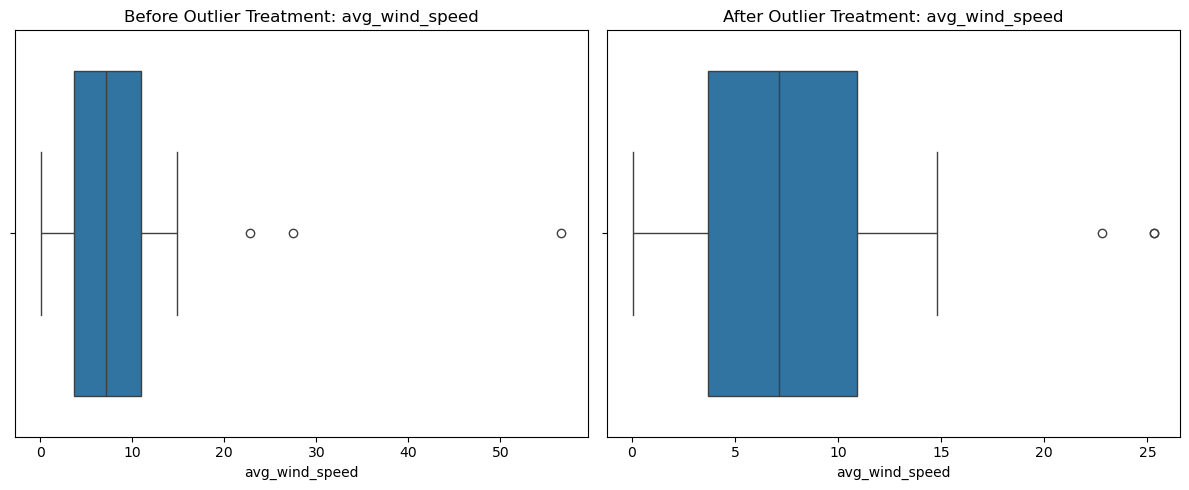

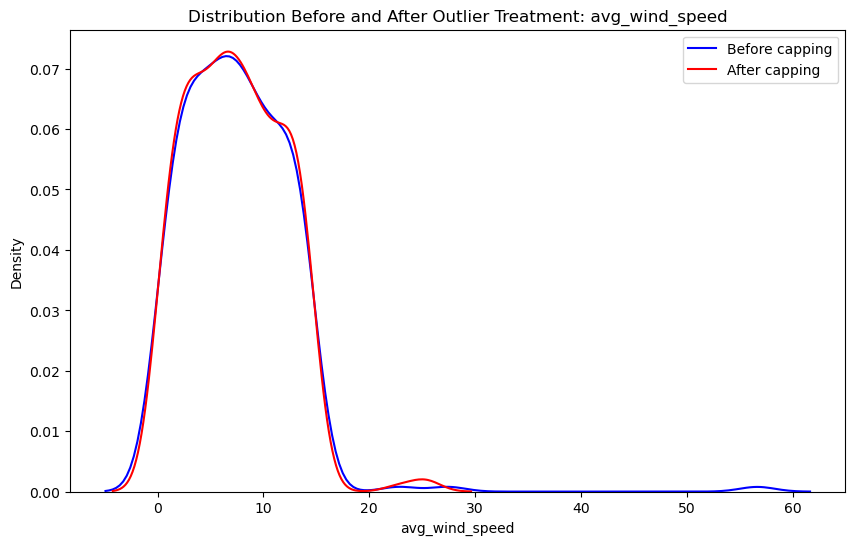

No outliers found in cloud_cover
No outliers found in pressure

Impact Summary of Outlier Treatment:
avg_temperature:
  - Standard deviation before: 6.76, after: 6.76
  - Reduction in variability: 0.00%
humidity:
  - Standard deviation before: 19.09, after: 19.09
  - Reduction in variability: 0.00%
avg_wind_speed:
  - Standard deviation before: 5.23, after: 4.51
  - Reduction in variability: 13.79%
cloud_cover:
  - Standard deviation before: 28.44, after: 28.44
  - Reduction in variability: 0.00%
pressure:
  - Standard deviation before: 28.84, after: 28.84
  - Reduction in variability: 0.00%


In [36]:
# Create a copy of the dataframe to preserve original values for comparison
weather_df_original = weather_df.copy()

def cap_outliers(df, col, method='iqr', threshold=1.5, visualize=True):
    """
    Identify and cap outliers in a given column
    
    Parameters:
    -----------
    df : pandas DataFrame
    col : str, column name
    method : str, 'iqr' or 'zscore'
    threshold : float, multiplier for IQR or number of std deviations
    visualize : bool, whether to visualize before and after
    
    Returns:
    --------
    df : pandas DataFrame with outliers capped
    """
    # For plotting before/after
    values_before = df[col].copy()
    
    if method == 'iqr':
        # Calculate IQR bounds
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
    elif method == 'zscore':
        # Calculate z-score bounds
        mean = df[col].mean()
        std = df[col].std()
        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std
    else:
        raise ValueError("Method must be 'iqr' or 'zscore'")
    
    # Count outliers before capping
    outliers_low = (df[col] < lower_bound).sum()
    outliers_high = (df[col] > upper_bound).sum()
    total_outliers = outliers_low + outliers_high
    
    if total_outliers > 0:
        print(f"Capping {total_outliers} outliers in {col} ({outliers_low} low, {outliers_high} high)")
        print(f"  - Range before capping: [{df[col].min():.2f}, {df[col].max():.2f}]")
        
        # Cap the outliers
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
        
        print(f"  - Range after capping: [{df[col].min():.2f}, {df[col].max():.2f}]")
        print(f"  - Bounds used: [{lower_bound:.2f}, {upper_bound:.2f}]")
    else:
        print(f"No outliers found in {col}")
    
    # Visualize before and after (optional)
    if visualize and total_outliers > 0:
        plt.figure(figsize=(12, 5))
        
        # Before capping boxplot
        plt.subplot(1, 2, 1)
        sns.boxplot(x=values_before)
        plt.title(f'Before Outlier Treatment: {col}')
        
        # After capping boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f'After Outlier Treatment: {col}')
        
        plt.tight_layout()
        plt.show()
        
        # Distribution before and after
        plt.figure(figsize=(10, 6))
        sns.kdeplot(values_before, label='Before capping', color='blue')
        sns.kdeplot(df[col], label='After capping', color='red')
        plt.title(f'Distribution Before and After Outlier Treatment: {col}')
        plt.legend()
        plt.show()
    
    return df

# Define columns for outlier treatment
numeric_cols = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']

# Apply outlier capping to each numeric feature
print("\nOutlier Treatment Results:")
for col in numeric_cols:
    if col in weather_df.columns:
        # You can customize settings for each column if needed
        if col == 'avg_wind_speed':
            # Wind speed might have more legitimate extreme values
            weather_df = cap_outliers(weather_df, col, threshold=2.0)
        else:
            weather_df = cap_outliers(weather_df, col)

# Summarize the impact of outlier treatment
print("\nImpact Summary of Outlier Treatment:")
for col in numeric_cols:
    if col in weather_df.columns:
        # Calculate statistics to see the impact
        orig_std = weather_df_original[col].std()
        new_std = weather_df[col].std()
        std_change = (orig_std - new_std) / orig_std * 100
        
        print(f"{col}:")
        print(f"  - Standard deviation before: {orig_std:.2f}, after: {new_std:.2f}")
        print(f"  - Reduction in variability: {std_change:.2f}%")


First 5 rows with date-based features:


,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure,year,month,day,...,season_Fall,season_Spring,season_Summer,season_Winter,month_sin,month_cos,day_of_week_sin,day_of_week_cos,quarter,week_of_year
0,2023-01-01,23.745401,46.140905,7.845981,1,20.851051,992.965681,2023,1,1,...,False,False,False,True,0.5,0.866025,-0.781831,0.623490,1,52
1,2023-01-02,30.030503,59.876587,5.382457,1,93.059521,1037.273025,2023,1,2,...,False,False,False,True,0.5,0.866025,0.000000,1.000000,1,1
2,2023-01-03,28.365224,51.464618,13.158008,1,11.636640,1034.193357,2023,1,3,...,False,False,False,True,0.5,0.866025,0.781831,0.623490,1,1
3,2023-01-04,27.550929,53.103799,5.886677,1,81.744971,968.610142,2023,1,4,...,False,False,False,True,0.5,0.866025,0.974928,-0.222521,1,1
4,2023-01-05,23.639303,57.826186,12.248992,1,38.062329,1030.264331,2023,1,5,...,False,False,False,True,0.5,0.866025,0.433884,-0.900969,1,1


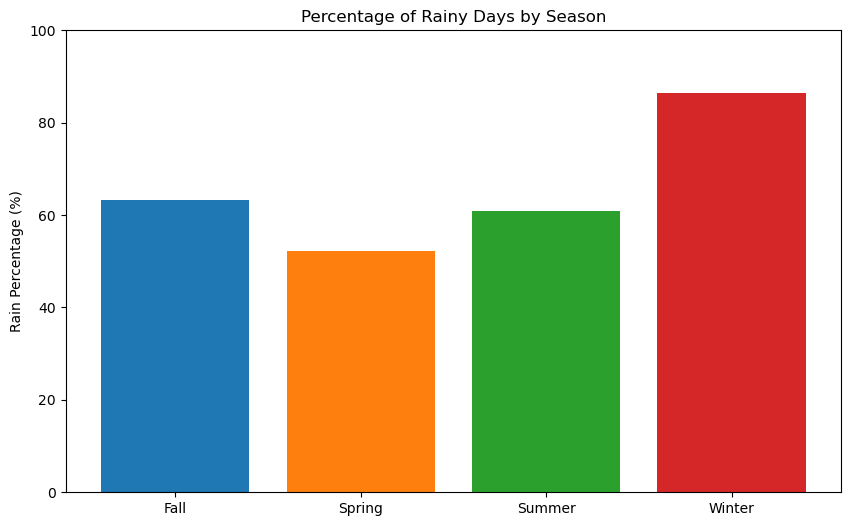

In [37]:
# Extract basic date components
weather_df['day_of_week'] = weather_df['date'].dt.dayofweek  # Monday=0, Sunday=6
weather_df['month'] = weather_df['date'].dt.month
weather_df['day'] = weather_df['date'].dt.day
weather_df['is_weekend'] = weather_df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Add day name for easier interpretation
weather_df['day_name'] = weather_df['date'].dt.day_name()

# Add seasonal features
weather_df['season'] = weather_df['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else
                                           'Spring' if x in [3, 4, 5] else
                                           'Summer' if x in [6, 7, 8] else 'Fall')
# One-hot encode season
weather_df = pd.get_dummies(weather_df, columns=['season'], prefix='season')

# Add cyclical features for month and day of week
# These better capture the circular nature of time
weather_df['month_sin'] = np.sin(2 * np.pi * weather_df['month']/12.0)
weather_df['month_cos'] = np.cos(2 * np.pi * weather_df['month']/12.0)
weather_df['day_of_week_sin'] = np.sin(2 * np.pi * weather_df['day_of_week']/7.0)
weather_df['day_of_week_cos'] = np.cos(2 * np.pi * weather_df['day_of_week']/7.0)

# Add quarter of year
weather_df['quarter'] = weather_df['date'].dt.quarter

# Create week of year feature
weather_df['week_of_year'] = weather_df['date'].dt.isocalendar().week

# Display the first few rows with the new features
print("\nFirst 5 rows with date-based features:")
display(weather_df.head())

# Visualize distribution of rain by season
plt.figure(figsize=(10, 6))
if 'rain_or_not' in weather_df.columns:
    season_cols = [col for col in weather_df.columns if col.startswith('season_')]
    for season in season_cols:
        season_name = season.replace('season_', '')
        rain_pct = weather_df[weather_df[season] == 1]['rain_or_not'].mean() * 100
        plt.bar(season_name, rain_pct)
    
    plt.title('Percentage of Rainy Days by Season')
    plt.ylabel('Rain Percentage (%)')
    plt.ylim(0, 100)
    plt.show()